# TASK 2

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read the csv file
df=pd.read_csv('/content/drive/MyDrive/World Indicators.csv')
df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
#checking the types of the data
df.dtypes

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [ ]:
#Checking the count of null values in each column
df.isnull().sum()

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [ ]:
df.describe(include='all')

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
count,199.000000,181,181.000000,1.360000e+02,188,185.000000,185,180.000000,188.000000,199.000000,131.000000,197.000000,197.000000,196.000000,191.000000,191.000000,191.000000,206.000000,208,208
unique,NaN,152,NaN,NaN,188,NaN,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,208
top,NaN,40.0%,NaN,NaN,"$199,070,864,638",NaN,$62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Algeria
freq,NaN,3,NaN,NaN,1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,1
mean,0.021759,NaN,30.331492,9.223794e+04,NaN,0.067362,NaN,279.283333,0.027340,0.376884,0.122588,72.746193,68.035533,0.958673,0.286963,0.635550,0.077424,0.576728,NaN,NaN
std,0.010721,NaN,56.584357,3.125758e+05,NaN,0.028462,NaN,247.783296,0.025358,0.284034,0.079495,10.091750,8.868297,0.431784,0.107775,0.071489,0.052995,0.244372,NaN,NaN
min,0.008000,NaN,1.000000,7.650000e+02,NaN,0.017000,NaN,12.000000,0.002000,0.000000,0.005000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000,NaN,NaN
25%,0.012000,NaN,9.000000,5.699000e+03,NaN,0.047000,NaN,151.750000,0.007000,0.100000,0.074500,67.000000,62.000000,0.700000,0.189000,0.581000,0.034000,0.377750,NaN,NaN
50%,0.019000,NaN,18.000000,1.808200e+04,NaN,0.065000,NaN,224.000000,0.016000,0.400000,0.106000,76.000000,70.000000,1.000000,0.279000,0.654000,0.056000,0.571500,NaN,NaN
75%,0.028000,NaN,35.000000,5.155725e+04,NaN,0.085000,NaN,327.000000,0.042250,0.600000,0.150000,80.000000,75.000000,1.200000,0.382500,0.684500,0.118000,0.772500,NaN,NaN


In [ ]:
#dropping these 2 columns as it has the highest missing values
df=df.drop(columns=['Energy Usage', 'Lending Interest'])

In [ ]:
#cleaning the data
df['GDP']=df['GDP'].str.replace('$','').str.replace(',','').astype('float')
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace('$','')
df['Business Tax Rate']=df['Business Tax Rate'].str.replace('%','').astype('float')
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace(',','').astype('float')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


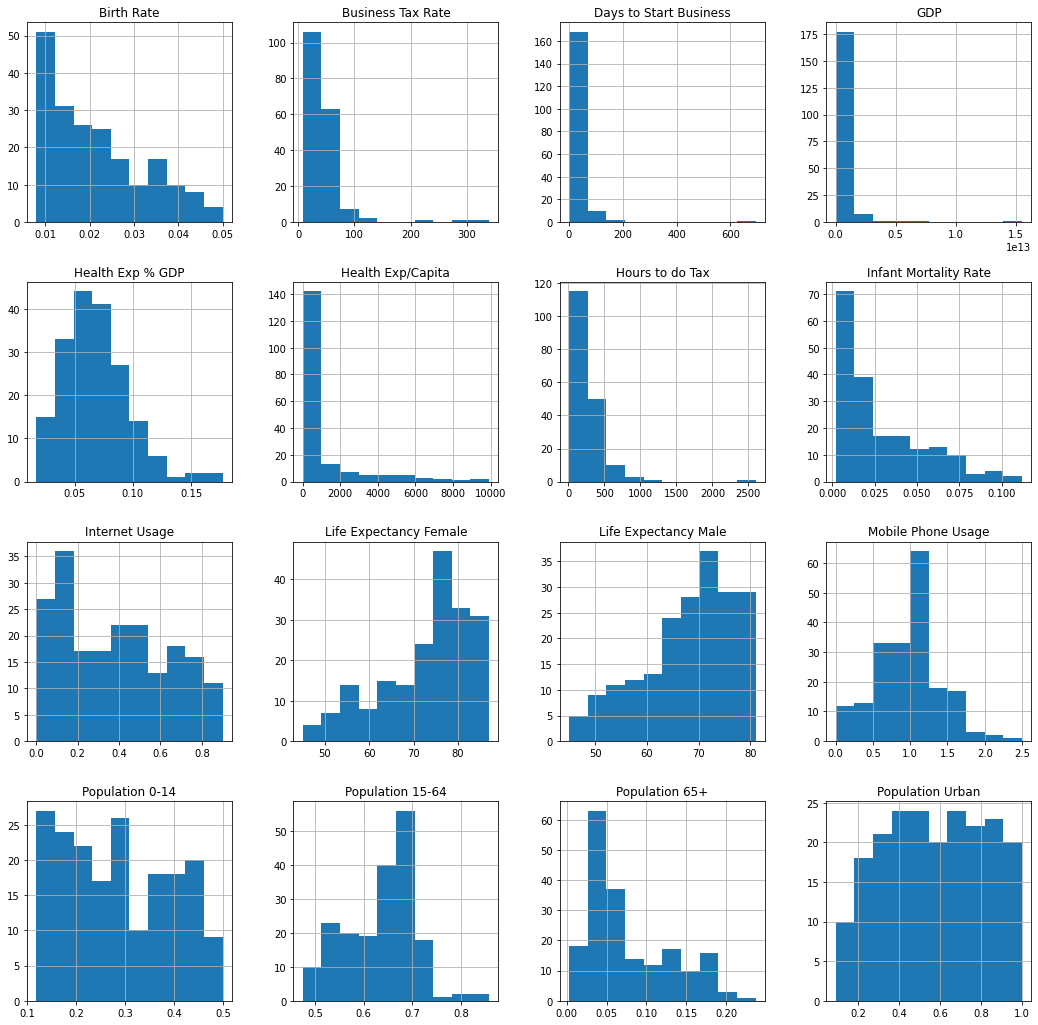

In [ ]:
#checking histogram to know whether it is postively screwed or negatively screwed or symmetric
fig = df.hist(figsize = (18,18))

In [ ]:
#replacing skewed with median and symmetric with mean 
df['Birth Rate'].fillna(int(df['Birth Rate'].median()), inplace=True)
df['Days to Start Business'].fillna(int(df['Days to Start Business'].median()), inplace=True)
df['Health Exp % GDP'].fillna(int(df['Health Exp % GDP'].mean()), inplace=True)
df['Health Exp/Capita'].fillna(int(df['Health Exp/Capita'].median()), inplace=True)
df['Hours to do Tax'].fillna(int(df['Hours to do Tax'].mean()), inplace=True)
df['Infant Mortality Rate'].fillna(int(df['Infant Mortality Rate'].median()), inplace=True)
df['Internet Usage'].fillna(int(df['Internet Usage'].mean()), inplace=True)
df['Life Expectancy Female'].fillna(int(df['Life Expectancy Female'].median()), inplace=True)
df['Life Expectancy Male'].fillna(int(df['Life Expectancy Male'].median()), inplace=True)
df['Mobile Phone Usage'].fillna(int(df['Mobile Phone Usage'].mean()), inplace=True)
df['Population 0-14'].fillna(int(df['Population 0-14'].median()), inplace=True)
df['Population 15-64'].fillna(int(df['Population 15-64'].median()), inplace=True)
df['Population 65+'].fillna(int(df['Population 65+'].median()), inplace=True)
df['Population Urban'].fillna(int(df['Population Urban'].mean()), inplace=True)
df['Business Tax Rate'].fillna(int(df['Business Tax Rate'].mean()), inplace=True)

In [ ]:
df.isnull().sum()

Birth Rate                 0
Business Tax Rate          0
Days to Start Business     0
GDP                       20
Health Exp % GDP           0
Health Exp/Capita          0
Hours to do Tax            0
Infant Mortality Rate      0
Internet Usage             0
Life Expectancy Female     0
Life Expectancy Male       0
Mobile Phone Usage         0
Population 0-14            0
Population 15-64           0
Population 65+             0
Population Urban           0
Region                     0
Country                    0
dtype: int64

In [ ]:
#replacing gdp with individual regions mean
df['GDP'] = df.groupby(['Region'])['GDP'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# converting categ column to numeric column using factorize
df['Region'] = pd.factorize(df['Region'])[0]

In [ ]:
df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,0,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,0,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,0,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,0,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,0,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.000,44.0,18.0,6.115802e+11,0.000,311.0,279.0,0.000,0.0,76.0,70.0,0.0,0.000,0.000,0.000,0.907,5,Turks and Caicos Islands
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,5,United States
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,5,Uruguay
206,0.020,62.8,141.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,5,"Venezuela, RB"


In [ ]:
#dropping  the target variable column which is not needed
df = df.drop(['Country'], axis=1)

In [ ]:
#dropping the rows which are redundant
df = df.drop_duplicates()

In [ ]:
df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,0
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,0
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,0
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,0
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.000,44.0,18.0,6.115802e+11,0.000,311.0,279.0,0.000,0.0,76.0,70.0,0.0,0.000,0.000,0.000,0.907,5
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,5
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,5
206,0.020,62.8,141.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,5


In [ ]:
df.dtypes

Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                      int64
dtype: object

In [ ]:
#normalizing the data into 0-1 range using Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(df)
scaled_data = model.transform(df)

In [ ]:
#scaling data
df_new = pd.DataFrame(scaled_data, columns = ['Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Urban', 'Region'])


In [ ]:
#now data is normalized into one range
df_new

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region
0,0.368258,0.819610,-0.070657,-0.138729,-0.466659,-0.433698,0.747209,-0.067492,-0.906243,-0.093478,0.099836,-0.007099,0.065523,0.520719,-0.438811,0.444968,-1.175566
1,2.217169,0.225222,0.705842,-0.210309,-0.759907,-0.464483,0.011985,3.244938,-0.906243,-2.027646,-2.104366,-0.850845,1.647578,-0.452345,-0.857661,-0.651217,-1.175566
2,1.424779,0.637411,0.005099,-0.283296,-0.437334,-0.545085,-0.040221,1.391554,-1.254026,-1.315058,-1.176281,-0.218035,1.300297,-0.238485,-0.766606,-0.595003,-1.175566
3,0.280215,-0.748500,0.592208,-0.277267,-0.232061,-0.337984,-0.553572,0.563447,-0.906243,-2.740234,-2.452398,1.258520,0.590302,0.221314,-0.657341,-0.024826,-1.175566
4,1.864995,-0.031649,-0.297925,-0.280958,0.119837,-0.542286,-0.040221,1.707024,-1.254026,-1.722251,-1.524313,-0.850845,1.500948,-0.356108,-0.839450,-1.229425,-1.175566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1.832826,-0.016715,-0.203230,0.172235,-1.756950,-0.390039,-0.001067,-0.974467,-1.254026,0.313715,0.215847,-1.905528,-2.033593,-3.120250,-1.294721,1.348418,1.517361
204,-0.688262,0.057957,-0.449437,11.421114,3.433538,4.175134,-0.401307,-0.737865,1.180457,0.822707,0.911910,-0.007099,-0.513277,0.456561,1.127321,0.954915,1.517361
205,-0.512175,-0.079439,-0.411559,-0.253186,0.823632,0.114839,0.246908,-0.580130,0.484890,0.720908,0.563879,1.047584,-0.312626,0.290819,1.236586,1.505016,1.517361
206,-0.071959,0.544818,2.126267,-0.050220,-0.437334,-0.291526,2.543940,-0.422395,0.137107,0.415513,0.331857,0.203838,0.212153,0.360323,-0.238492,1.272127,1.517361


# K-Means

In [ ]:
from sklearn.cluster import KMeans
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
sse = []
for k in range(1, 11):
  km = KMeans(n_clusters=k)
  km=km.fit(df_new)
  sse.append(km.inertia_)
  distortions.append(sum(np.min(cdist(df_new, km.cluster_centers_,'euclidean'), axis=1)) / df_new.shape[0])
  inertias.append(km.inertia_)

The elbow method is a heuristic used in determining the number of clusters in a data set

SSE - Sum of Square Error - It is the difference between the observed value and the predicted value.
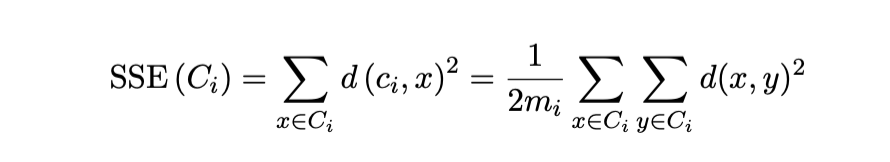

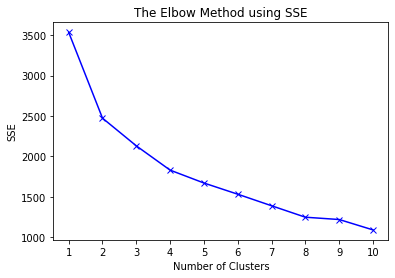

In [ ]:
#elbow curve using sse
plt.title('The Elbow Method using SSE')
plt.plot(range(1, 11), sse,'bx-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
X = df_new.iloc[:,0:18].values

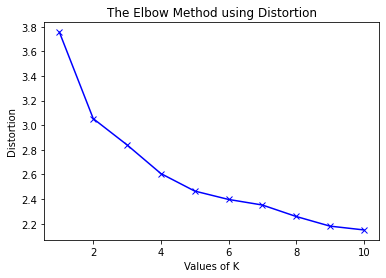

In [ ]:
K = range(1, 11)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

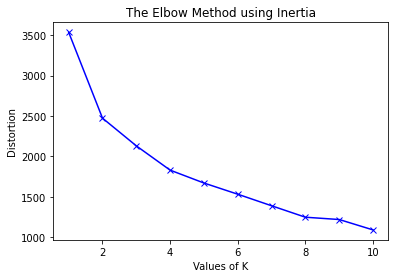

In [ ]:
K = range(1, 11)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Inertia')
plt.show()

Silhoette Score:
The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
Positive values indicate a high separation between clusters.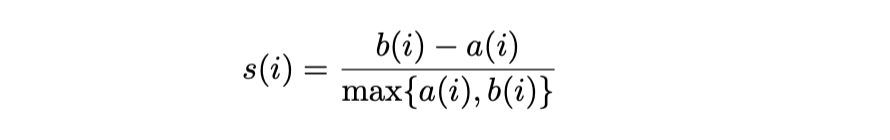

In [ ]:
from sklearn.metrics import silhouette_score
sil = []

kmax = 10
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_new.iloc[:,0:18])
  labels = kmeans.labels_
  print(k,'K Means Silhouette Score: ',silhouette_score(df_new.iloc[:,0:18], labels, metric = 'euclidean'))
  sil.append(silhouette_score(df_new.iloc[:,0:18], labels, metric = 'euclidean'))
  ch.append(metrics.calinski_harabasz_score(df_new, labels))

2 K Means Silhouette Score:  0.29056113797397237
3 K Means Silhouette Score:  0.31797268368443005
4 K Means Silhouette Score:  0.2742492962203445
5 K Means Silhouette Score:  0.2785604779865155
6 K Means Silhouette Score:  0.2041869115119832
7 K Means Silhouette Score:  0.22764354888947064
8 K Means Silhouette Score:  0.21724159917889024
9 K Means Silhouette Score:  0.22028303478390335
10 K Means Silhouette Score:  0.20986747881342452


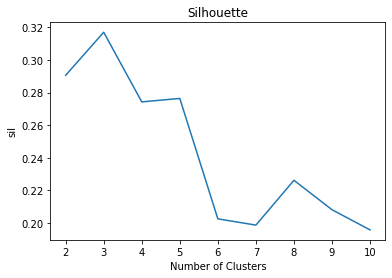

In [ ]:
# we need to pick cluster where silhouette score is max
plt.title('Silhouette')
plt.plot(range(2, 11),sil)
plt.xlabel("Number of Clusters")
plt.ylabel("sil")
plt.show()

Here the highest Silhouette Score is for Cluster n=3

Calinski-Harabasz index: The Calinski-Harabasz index is calculated as a ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters.

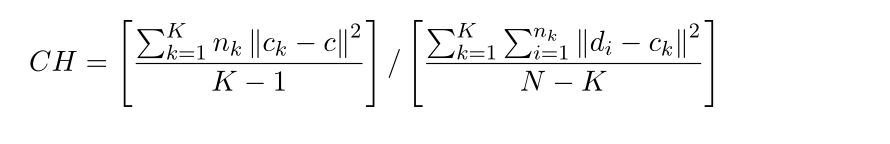

In [ ]:
ch=[]
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_new.iloc[:,0:18])
  labels = kmeans.labels_
  ch.append(metrics.calinski_harabasz_score(df_new, labels))
  print(k,' ',metrics.calinski_harabasz_score(df_new, labels))

2   88.44085257507811
3   67.55206398999186
4   63.32615234242523
5   56.60942516762363
6   53.95716739919289
7   50.690110543037584
8   48.84391458117486
9   50.417111591610556
10   46.303001257719906


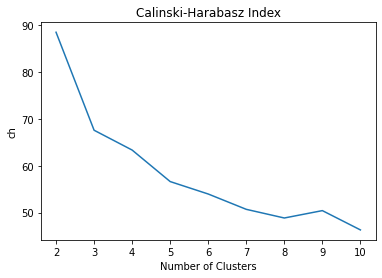

In [ ]:
# we need to pick cluster where Calinski-Harabasz Index is max
plt.title('Calinski-Harabasz Index')
plt.plot(range(2, 11),ch)
plt.xlabel("Number of Clusters")
plt.ylabel("ch")
plt.show()

Here CH Index is high for n=2

In [ ]:
pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dunn Index: The lowest intercluster distance (ie. the smallest distance
between any two cluster centroids) divided by the highest
intracluster distance (ie. the largest distance between any
two points in any cluster).
This ratio should be maximized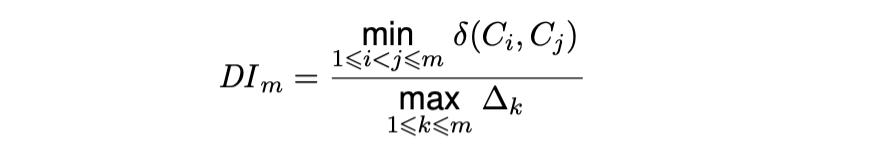

In [ ]:

from sklearn.cluster import k_means
from sklearn.metrics import pairwise_distances
from sklearn.datasets import load_iris
from validclust import dunn

for i in range(2,11):
  _, labels, _ = k_means(df_new, n_clusters=i)
  dist = pairwise_distances(df_new)
  print(i, ' ', dunn(dist, labels))


2   0.07098540603667076
3   0.08087016687851989
4   0.05806671591630193
5   0.0635237207309022
6   0.08004915137281163
7   0.08428488686199684
8   0.06750691885536243
9   0.12558642869646838
10   0.12558642869646838


Here the highest Dunn Index is for Cluster n=3

As Dunn Index and Silhoutte Score species n=3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_new)
y=kmeans.labels_
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1,
       0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2], dtype=int32)

In [ ]:
# The 3d Clustered Class using Life Expectancy Female vs Life Expectancy male vs Birthrate
from matplotlib import projections
import plotly.graph_objects as go
x=df_new['Life Expectancy Male']
y=df_new['Birth Rate']
z=df_new['Life Expectancy Female']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=y,               
    )
)])

fig.update_layout(
            title={
            'text' : '3D plot by Kmeans Clustering',
            'x':0.5,
            'xanchor': 'center'
        })
fig.show()

In [ ]:
x=df_new['Population 0-14']
y=df_new['Population 15-64']
z=df_new['Population 65+']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=y,               
    )
)])

fig.update_layout(
            title={
            'text' : '3D plot by Kmeans Clustering',
            'x':0.5,
            'xanchor': 'center'
        })
fig.show()

# Hierarchial Clustering

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
sil = []
kmax = 10

for k in range(2, kmax+1):
  cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')  
  cluster.fit_predict(df_new)
  cluster.labels_
  print(k,' Hierarchical Silhouette Score:',silhouette_score(df_new,cluster.labels_))
  sil.append(silhouette_score(df_new,cluster.labels_))

2  Hierarchical Silhouette Score: 0.2840625512162601
3  Hierarchical Silhouette Score: 0.3088731322961559
4  Hierarchical Silhouette Score: 0.27774420849967496
5  Hierarchical Silhouette Score: 0.2816738798707401
6  Hierarchical Silhouette Score: 0.2907391581144496
7  Hierarchical Silhouette Score: 0.2003003413697027
8  Hierarchical Silhouette Score: 0.19355134799325419
9  Hierarchical Silhouette Score: 0.1997301357421965
10  Hierarchical Silhouette Score: 0.1693918979737827


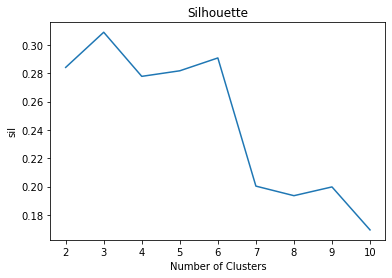

In [ ]:
# we need to pick cluster where silhouette score is max
plt.title('Silhouette')
plt.plot(range(2, 11),sil)
plt.xlabel("Number of Clusters")
plt.ylabel("sil")
plt.show()

Here the highest Silhouette Score is for Cluster n=3

In [ ]:
ch=[]
for k in range(2, kmax+1):
  
  cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')  
  cluster.fit_predict(df_new)
  cluster.labels_
  ch.append(metrics.calinski_harabasz_score(df_new, cluster.labels_))
  print(k,' ',metrics.calinski_harabasz_score(df_new, cluster.labels_))

2   85.05711773512317
3   65.37662258530403
4   59.82692481238666
5   53.75167742859941
6   50.800107445009616
7   48.45909596423307
8   47.221835281084694
9   47.10721362423953
10   47.715815234041486


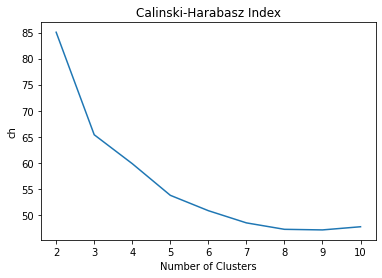

In [ ]:
# we need to pick cluster where Calinski-Harabasz Index is max
plt.title('Calinski-Harabasz Index')
plt.plot(range(2, 11),ch)
plt.xlabel("Number of Clusters")
plt.ylabel("ch")
plt.show()

Here the highest CH Ratio is for Cluster n=2

In [ ]:
ch=[]
for i in range(2,11):
  cluster = AgglomerativeClustering(n_clusters=i, linkage='ward')  
  cluster.fit_predict(df_new)
  x=cluster.labels_
  dist = pairwise_distances(df_new)
  print(i, ' ', dunn(dist, x))
  ch.append(dunn(dist, x))

2   0.07828244771031286
3   0.07828244771031286
4   0.08775151534531296
5   0.1088267927856178
6   0.1088267927856178
7   0.09841004329549606
8   0.09880861210955491
9   0.14715030419403577
10   0.14715030419403577


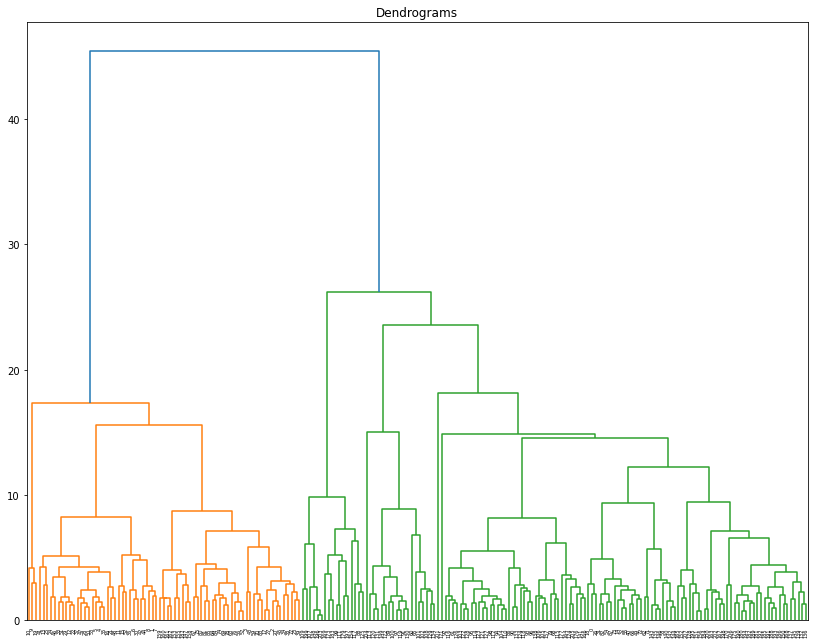

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14, 11))  
plt.title("Dendrograms")  
dend = shc.dendrogram(linkage(df_new, method = 'ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')  
cluster.fit_predict(df_new)
x=cluster.labels_

In [ ]:
x

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0])

In [ ]:
x=df_new['Internet Usage']
y=df_new['Mobile Phone Usage']
z=df_new['Population 65+']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=y,               
    )
)])

fig.update_layout(
            title={
            'text' : '3D plot by Hierarchial Clustering',
            'x':0.5,
            'xanchor': 'center'
        })
fig.show()

In [ ]:
x=df_new['Infant Mortality Rate']
y=df_new['Birth Rate']
z=df_new['Region']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=y,               
    )
)])

fig.update_layout(
            title={
            'text' : '3D plot by 3D plot by Hierarchial Clustering',
            'x':0.5,
            'xanchor': 'center'
        })
fig.show()

External Validation between K-Means and Hierarchial Clustering Methods.

In [ ]:
#Function to compute the accuracy
def Accuracy_computation(Dataset,y_true,y_pred):
    TP=0
    TN=0
    FP=0
    FN=0
    for i in range(len(y_true)-1):
      for j in range(i+1,len(y_pred)):
        if y_true[i]==y_true[j]  and y_pred[i]==y_pred[j]:
          TP+=1
        elif y_true[i]!=y_true[j] and y_pred[i]==y_pred[j]:
          FP+=1
        elif y_true[i]!=y_true[j] and y_pred[i]!=y_pred[j]:
          TN+=1
        else:
          FN+=1
    Accuracy=(TP+TN)/(TP+TN+FP+FN)

    print("For n_clusters = 3 , The Accuracy score is :",
            Accuracy,)
  
  #Function to compute the F-1 Score
def F1_Score_computation(Dataset,y_true,y_pred):
    TP=0
    TN=0
    FP=0
    FN=0
    for i in range(len(y_true)-1):
      for j in range(i+1,len(y_pred)):
        if y_true[i]==y_true[j]  and y_pred[i]==y_pred[j]:
          TP+=1
        elif y_true[i]!=y_true[j] and y_pred[i]==y_pred[j]:
          FP+=1
        elif y_true[i]!=y_true[j] and y_pred[i]!=y_pred[j]:
          TN+=1
        else:
          FN+=1
    precision_score=TP/(TP+FP)
    recall_score=TP/(TP+FN)
    f1_score=(2*(precision_score*recall_score))/(precision_score+recall_score)


    print("For n_clusters = The F-1 score is :",
            f1_score,)

In [ ]:
Accuracy_computation(df_new,x,y)

For n_clusters = 3 , The Accuracy score is : 0.9319955406911928


In [ ]:
F1_Score_computation(df_new,x,y)

For n_clusters = The F-1 score is : 0.923350785340314


In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Project1Task2.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Project1Task2.ipynb to html
[NbConvertApp] Writing 769908 bytes to /content/drive/MyDrive/Project1Task2.html
